In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pybaseball import lahman
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.special import expit #inverse logit
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [136]:
data = pd.read_csv("project_data.csv")

del data["id"]
data = data.dropna()
data = data[data['nfl_attempts'] >= 50]
data = data[data['att'] >= 10]
data = data.reset_index(drop=True)
data.rename(columns = {'ay/a':'aya'}, inplace = True)
data.rename(columns = {'y/a':'ypa'}, inplace = True)

data['td_int_ratio'] = data['td'] / data['int']

data
data.describe()


,draft_year,pick_number,name,nfl_passer_rating,nfl_attempts,nfl_start_wins,career_nfl_games,power_5,college_career_years,college_career_games,...,yds,ypa,aya,td,int,rate,rsh_att,rsh_yrds,rsh_tds,td_int_ratio
0,2010,1,Sam Bradford,84.5,2967,34,83,1,3.0,31.0,...,8403.0,9.4,10.6,88.0,16.0,175.6,77.0,36.0,5.0,5.500000
1,2010,25,Tim Tebow,75.3,361,8,35,1,4.0,53.0,...,9285.0,9.3,10.4,88.0,16.0,170.8,692.0,2947.0,57.0,5.500000
2,2010,48,Jimmy Clausen,61.9,472,1,21,1,3.0,35.0,...,8148.0,7.3,7.3,60.0,27.0,137.2,175.0,-355.0,5.0,2.222222
3,2010,85,Colt McCoy,78.1,989,8,44,1,4.0,53.0,...,13253.0,8.1,8.2,112.0,45.0,155.0,447.0,1571.0,20.0,2.488889
4,2010,155,John Skelton,63.0,602,8,20,0,4.0,43.0,...,9923.0,7.3,7.1,69.0,36.0,131.4,296.0,1216.0,14.0,1.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2000,18,Chad Pennington,90.1,2471,44,89,0,3.0,38.0,...,11446.0,8.6,9.2,107.0,30.0,157.6,168.0,61.0,4.0,3.566667
76,2000,75,Chris Redman,78.6,500,4,31,1,4.0,43.0,...,12541.0,7.5,7.1,84.0,51.0,134.6,167.0,-412.0,3.0,1.647059
77,2000,168,Marc Bulger,84.4,3171,41,96,1,4.0,38.0,...,8153.0,8.0,7.6,59.0,34.0,140.9,107.0,-326.0,2.0,1.735294
78,2000,199,Tom Brady,97.3,10598,230,301,1,4.0,29.0,...,4773.0,7.5,7.2,30.0,17.0,134.9,90.0,-150.0,3.0,1.764706


,draft_year,pick_number,nfl_passer_rating,nfl_attempts,nfl_start_wins,career_nfl_games,power_5,college_career_years,college_career_games,cmp,...,yds,ypa,aya,td,int,rate,rsh_att,rsh_yrds,rsh_tds,td_int_ratio
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2004.925000,86.362500,74.630000,2037.212500,30.187500,73.450000,0.712500,3.762500,39.650000,632.237500,...,8017.162500,7.653750,7.543663,60.150000,29.025000,136.867558,232.750000,466.887500,10.437500,2.261916
std,2.950113,75.615993,13.007246,2534.601602,45.258496,70.134392,0.455452,0.579038,7.841951,242.684263,...,2896.173956,0.784493,1.222377,25.193982,12.189407,15.178027,123.657602,783.001123,8.630009,1.177154
min,2000.000000,1.000000,26.000000,52.000000,0.000000,2.000000,0.000000,2.000000,22.000000,20.000000,...,192.000000,5.800000,4.500000,0.000000,1.000000,103.400000,11.000000,-533.000000,0.000000,0.000000
25%,2003.000000,18.750000,68.625000,405.000000,2.000000,26.000000,0.000000,4.000000,35.000000,462.000000,...,5696.750000,7.100000,6.800000,41.000000,21.000000,126.975000,150.250000,-72.250000,5.000000,1.532225
50%,2005.000000,68.000000,75.300000,775.000000,8.500000,44.500000,1.000000,4.000000,40.500000,626.000000,...,8029.000000,7.500000,7.416155,59.500000,28.000000,134.500000,219.500000,192.000000,9.000000,2.146368
75%,2007.000000,150.500000,82.325000,2561.750000,36.250000,91.000000,1.000000,4.000000,45.000000,807.000000,...,10243.500000,8.225000,8.300000,81.750000,35.250000,147.525000,274.250000,918.500000,14.000000,2.546875
max,2010.000000,250.000000,103.900000,10598.000000,230.000000,301.000000,1.000000,5.000000,61.000000,1157.000000,...,13484.000000,9.600000,10.600000,115.000000,62.000000,176.700000,692.000000,3127.000000,57.000000,7.533333


In [141]:
nfl_expectation_ols_formula = "nfl_passer_rating ~ power_5 + college_career_games + pct + rate + aya "
nfl_expectation_ols_model = smf.ols(formula = nfl_expectation_ols_formula, data=data).fit()
nfl_expectation_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      nfl_passer_rating   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.493
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.202
Time:                        00:23:11   Log-Likelihood:                -314.41
No. Observations:                  80   AIC:                             640.8
Df Residuals:                      74   BIC:                             655.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               48.4434     20.313      2.385      0.020       7.969      88.917
power_5                 -0.9084      3.354     -0.271      0.787      -7.592       5.776
college_career_games    -0.2991      0.189     -1.580      0.118      -0.676       0.078
pct                      1.2975      0.588      2.205      0.031       0.125       2.470
rate                    -0.3663      0.368     -0.996      0.322      -1.099       0.366
aya                      1.4885      3.611      0.412      0.681      -5.706       8.683
==============================================================================
Omnibus:                       14.542   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.570
Skew:                          -0.742   Prob(JB):                     2.07e-05
Kurtosis:                       5.067   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


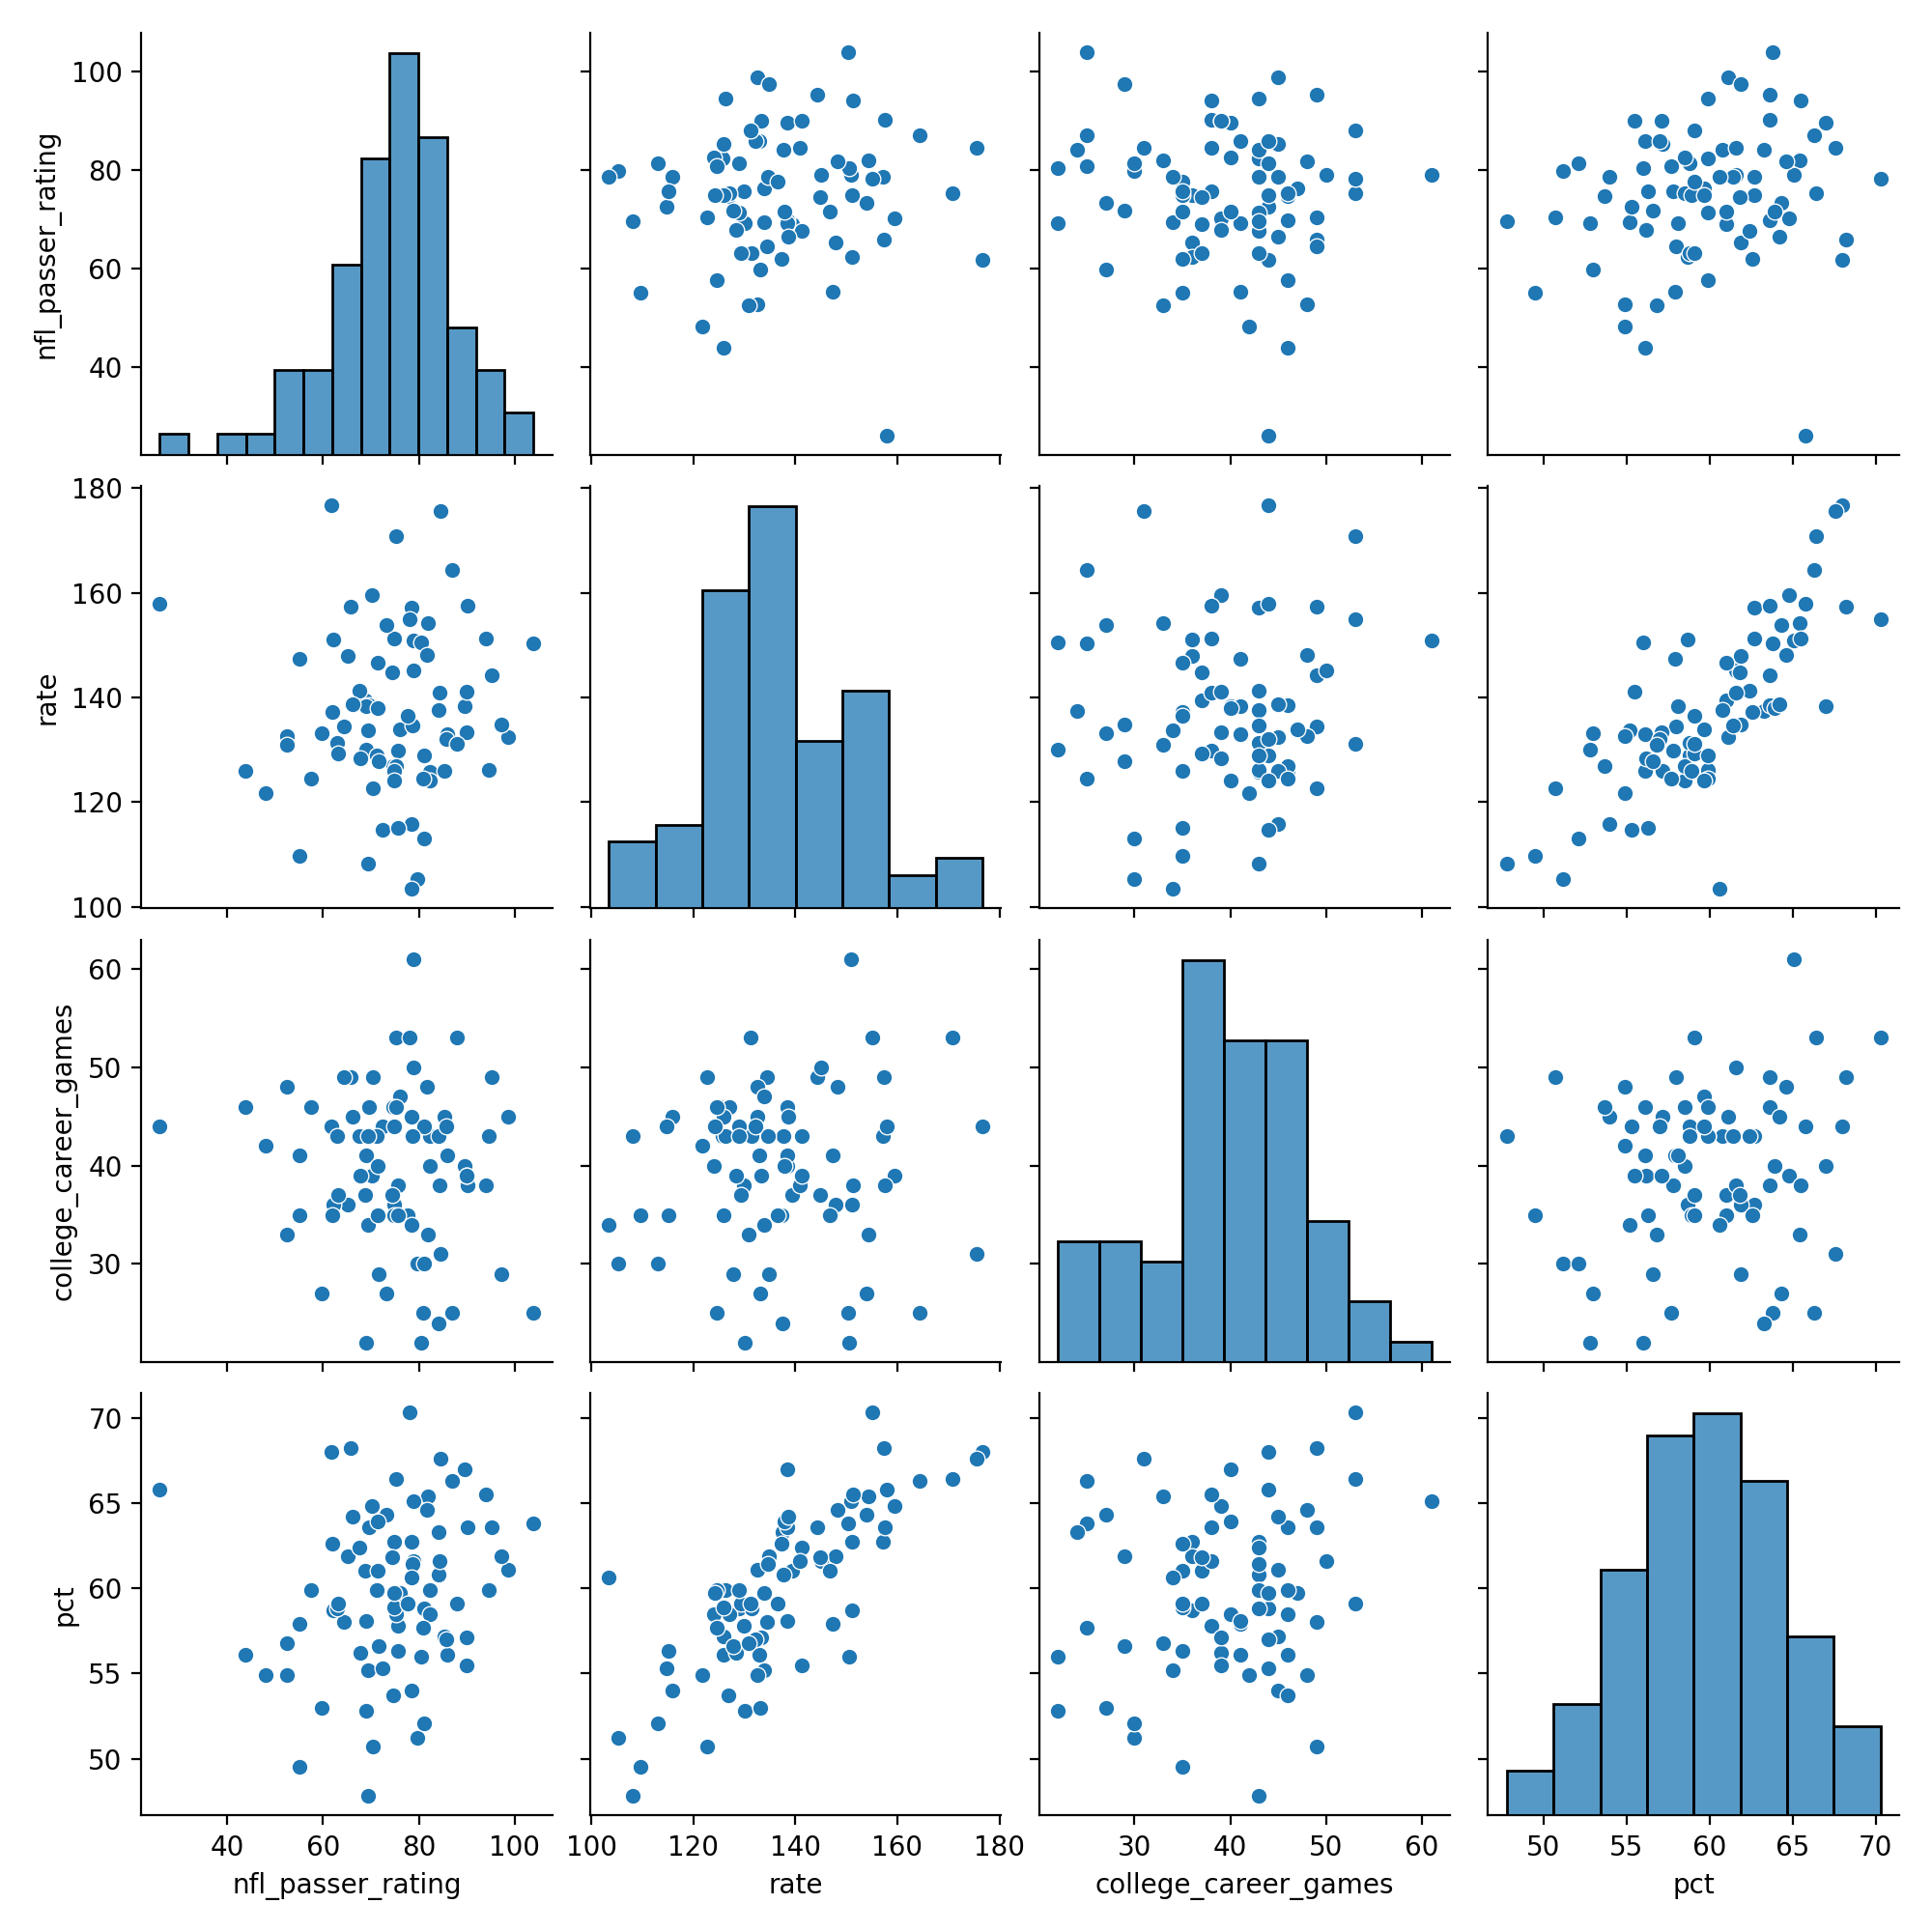

In [114]:
qbs_selected_data = data[['nfl_passer_rating','rate','college_career_games','pct']]
sns.pairplot(qbs_selected_data)
plt.savefig('all_relations_histogram.png')

<IPython.core.display.Javascript object>


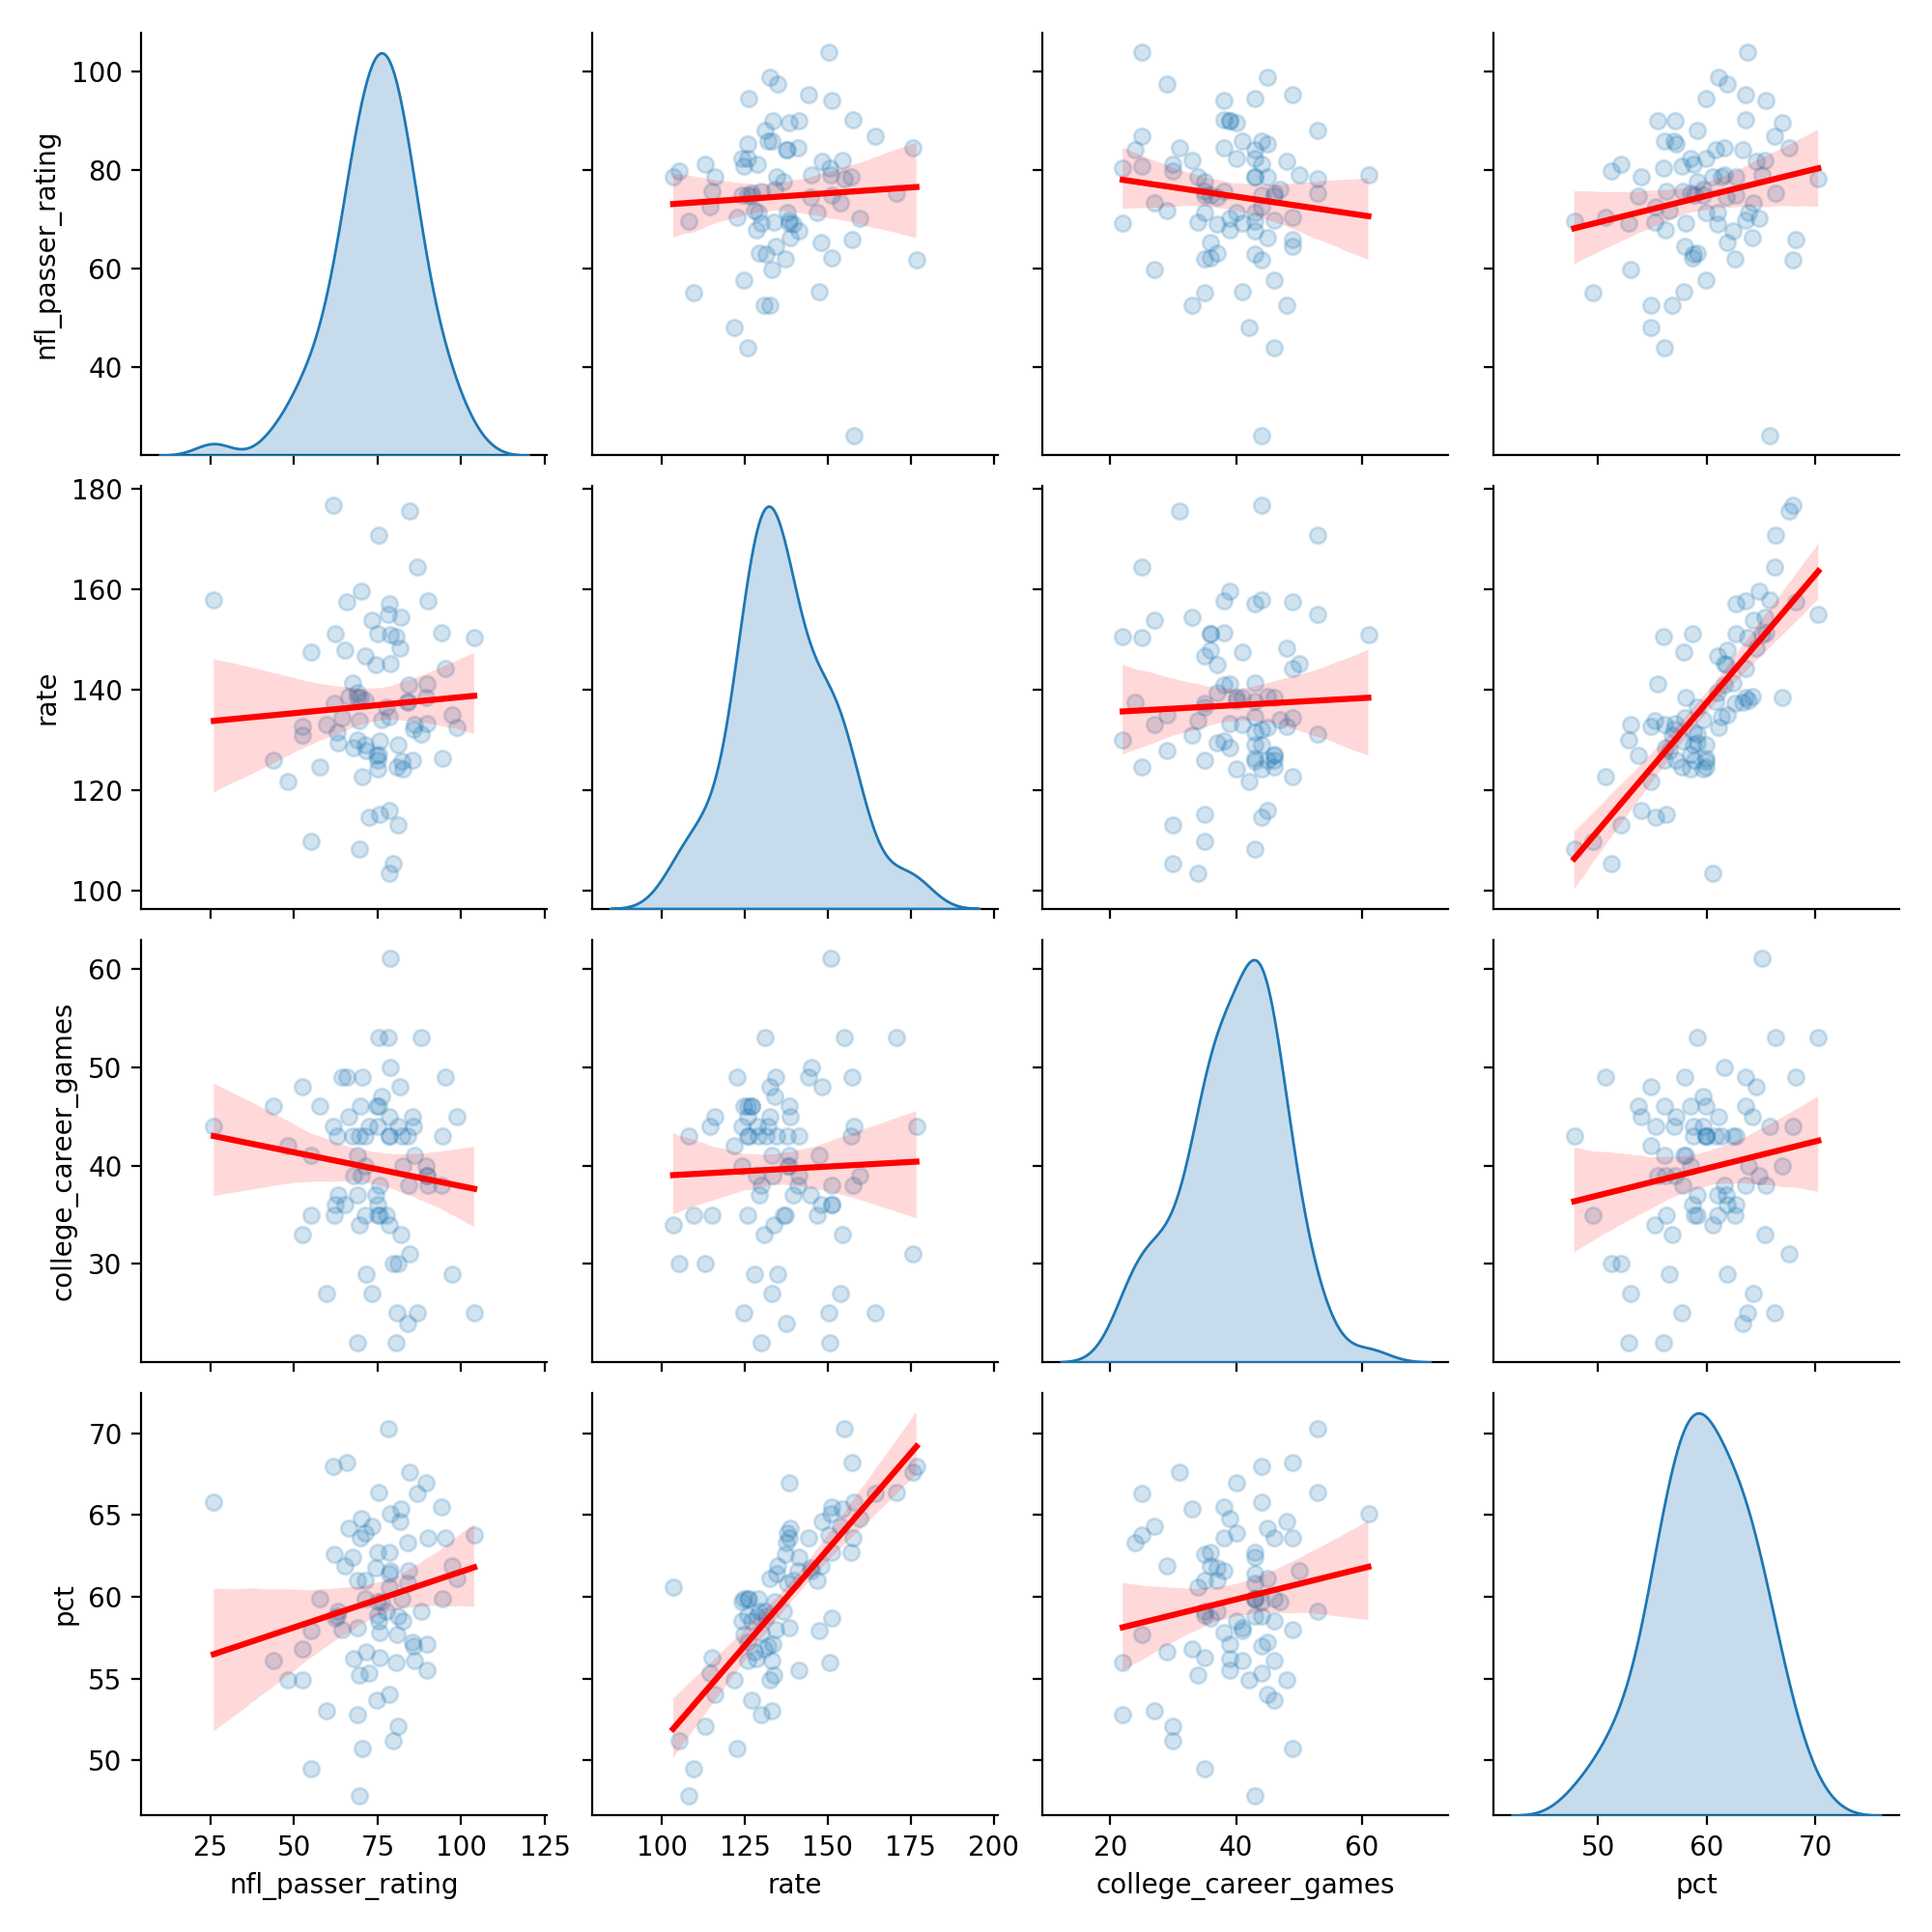

In [112]:
teams_selected_data = data[['nfl_passer_rating','rate','college_career_games','pct']]
sns.pairplot(teams_selected_data, diag_kind="kde",kind = "reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.2}})
plt.savefig('all_relations_density.png')

<IPython.core.display.Javascript object>


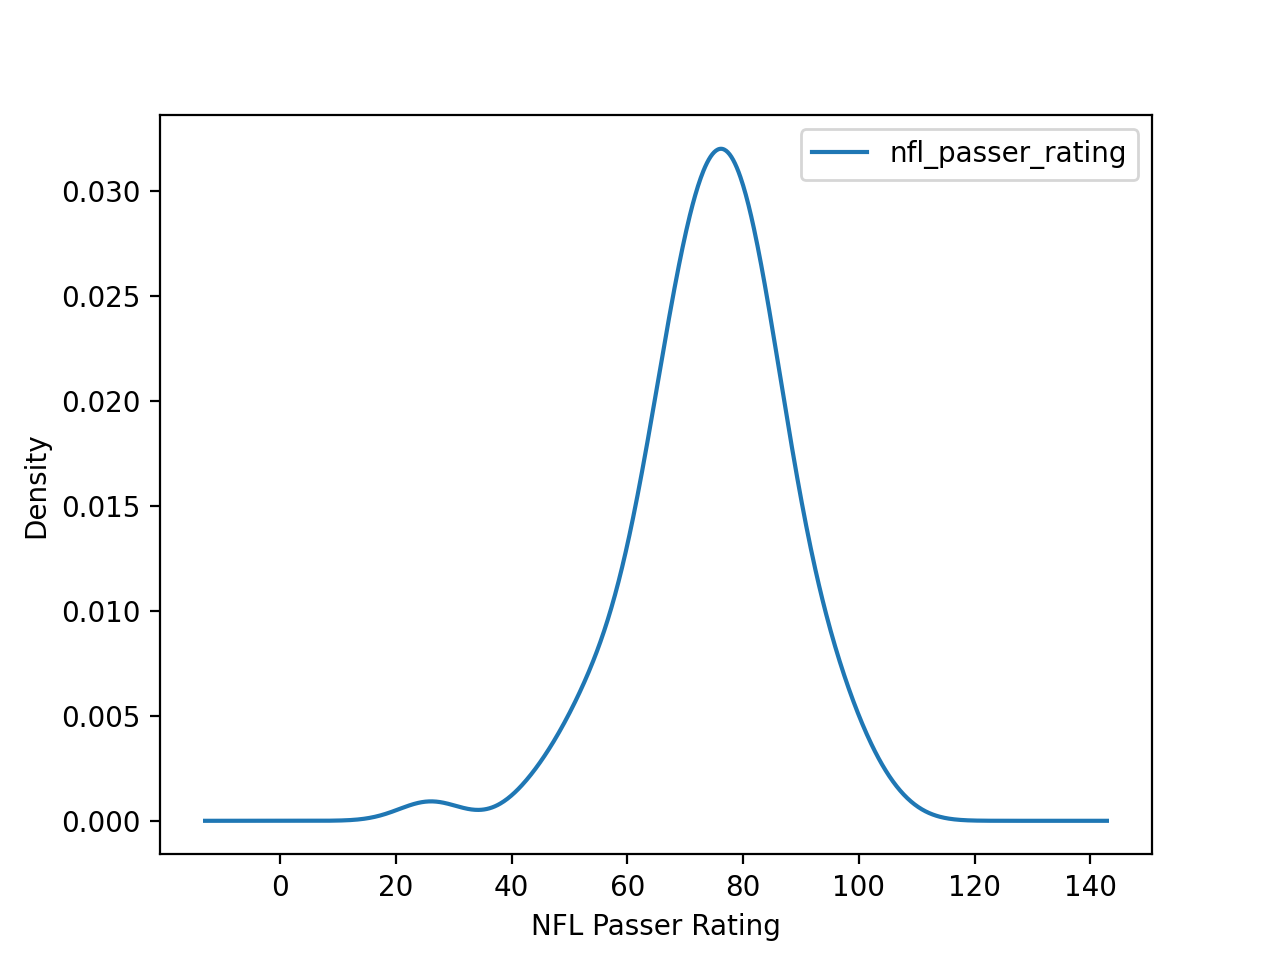

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'NFL Passer Rating')

([<matplotlib.axis.XTick at 0x7ff39a0d53a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [155]:
data[['nfl_passer_rating']].plot.density()
plt.xlabel("NFL Passer Rating")
plt.xticks(np.arange(0, 160, 20))
plt.savefig("Passer_rating_density.png")

<IPython.core.display.Javascript object>


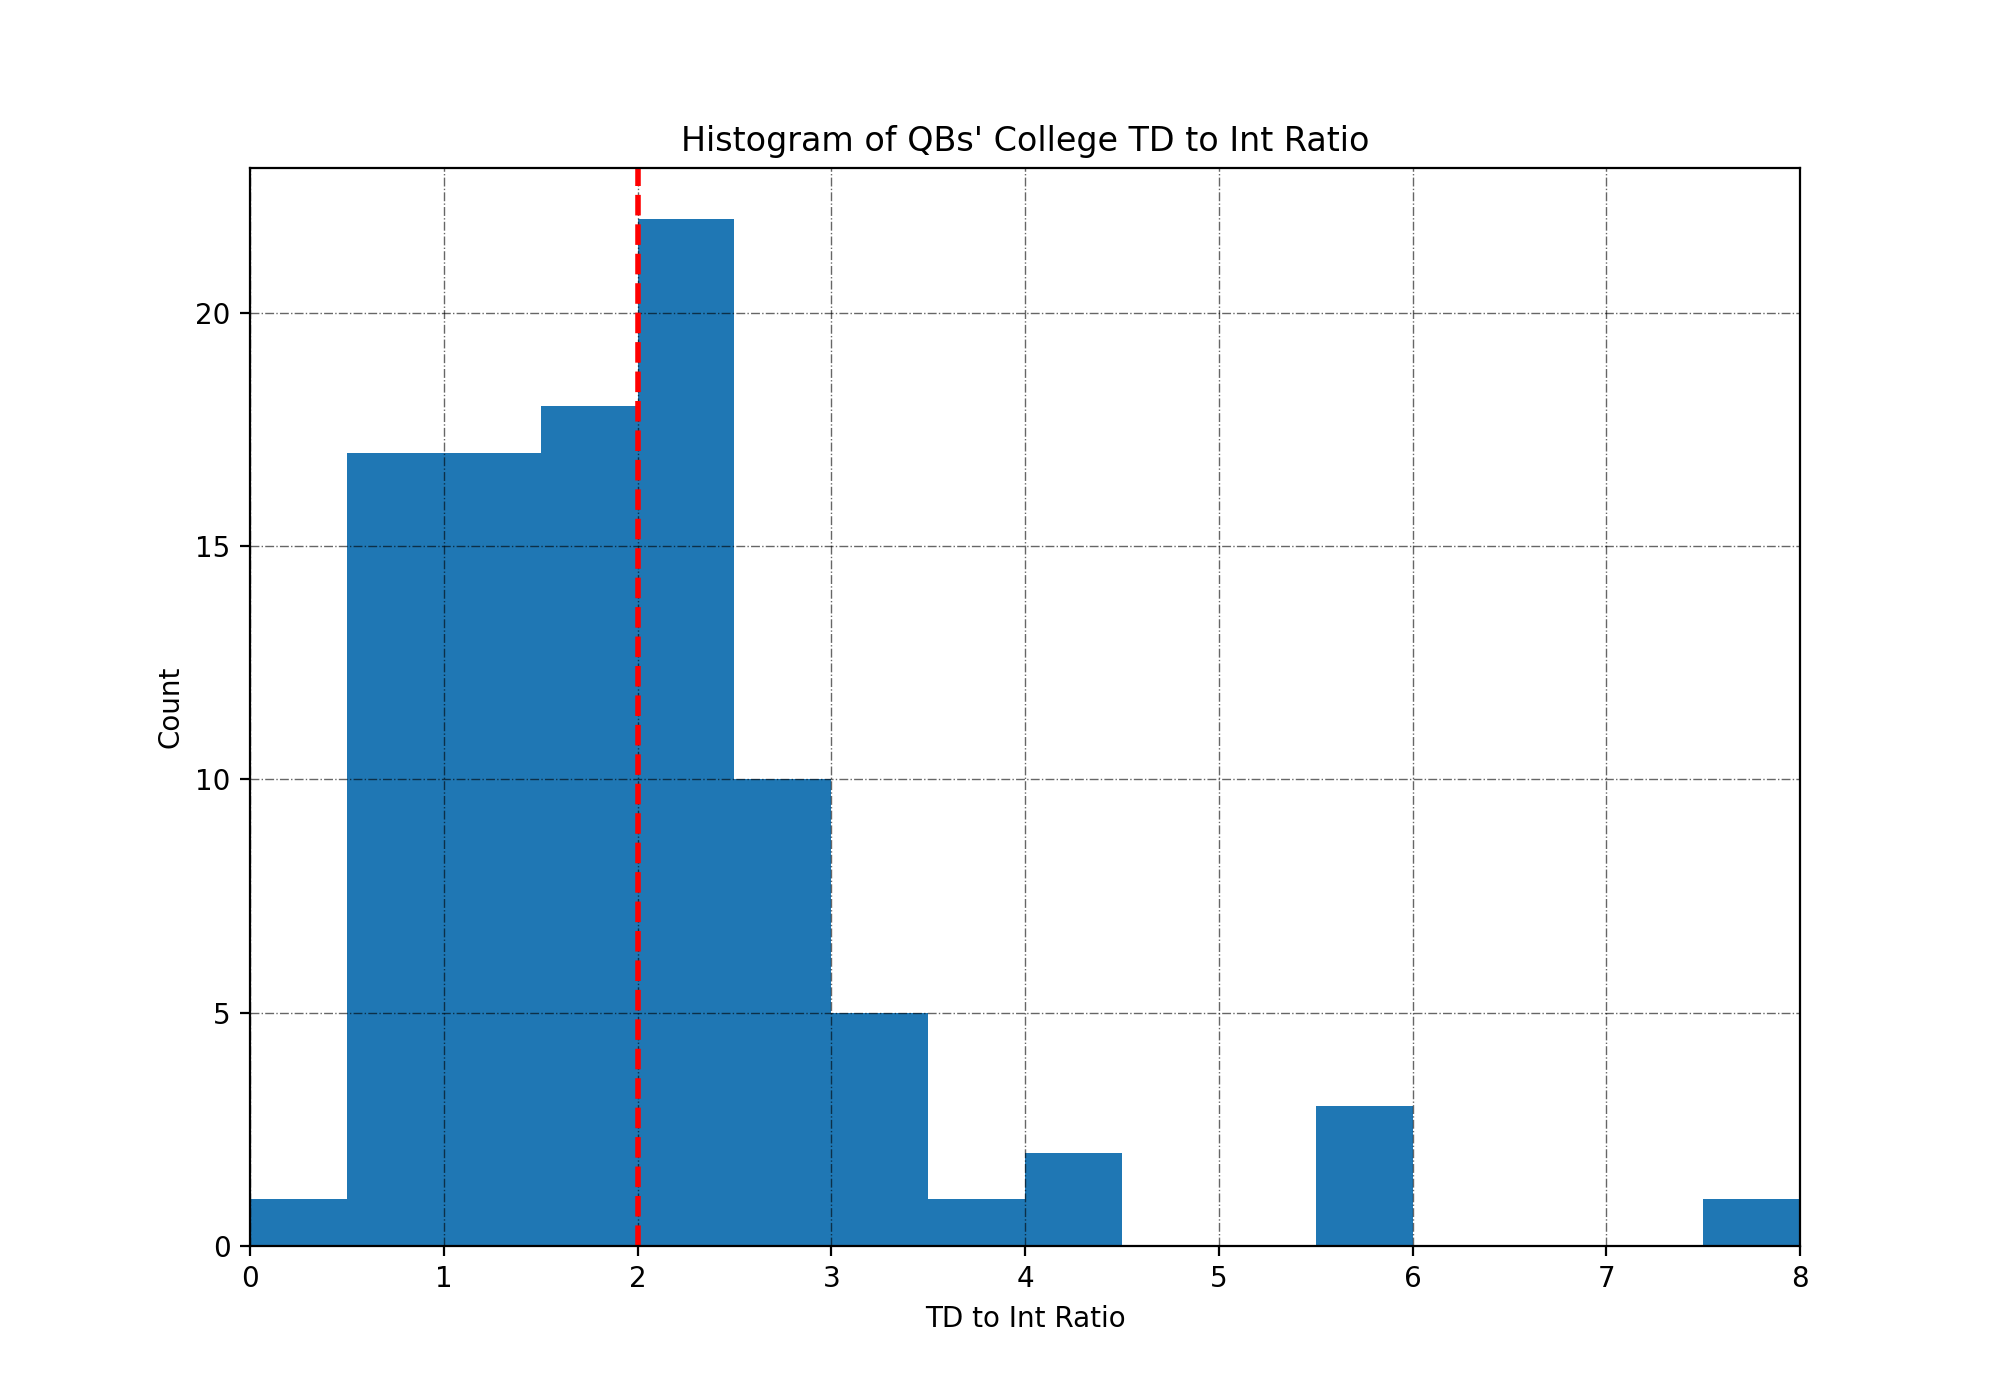

(array([ 1., 17., 18., 22., 10.,  5.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,
         0.,  1.]),
 array([0. , 0.5, 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
        7. , 7.5, 8. ]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, "Histogram of QBs' College TD to Int Ratio")

Text(0.5, 0, 'TD to Int Ratio')

Text(0, 0.5, 'Count')

In [156]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data.td_int_ratio, bins = [0,.5,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])

ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6)

ax.set_title("Histogram of QBs' College TD to Int Ratio")
ax.set_xlabel("TD to Int Ratio")
ax.set_ylabel("Count")
ax.axvline(x=2, color='r', linestyle='dashed', linewidth=2)
ax.margins(x=0)


plt.show()

plt.savefig("TD_int_histogram.png")

<IPython.core.display.Javascript object>


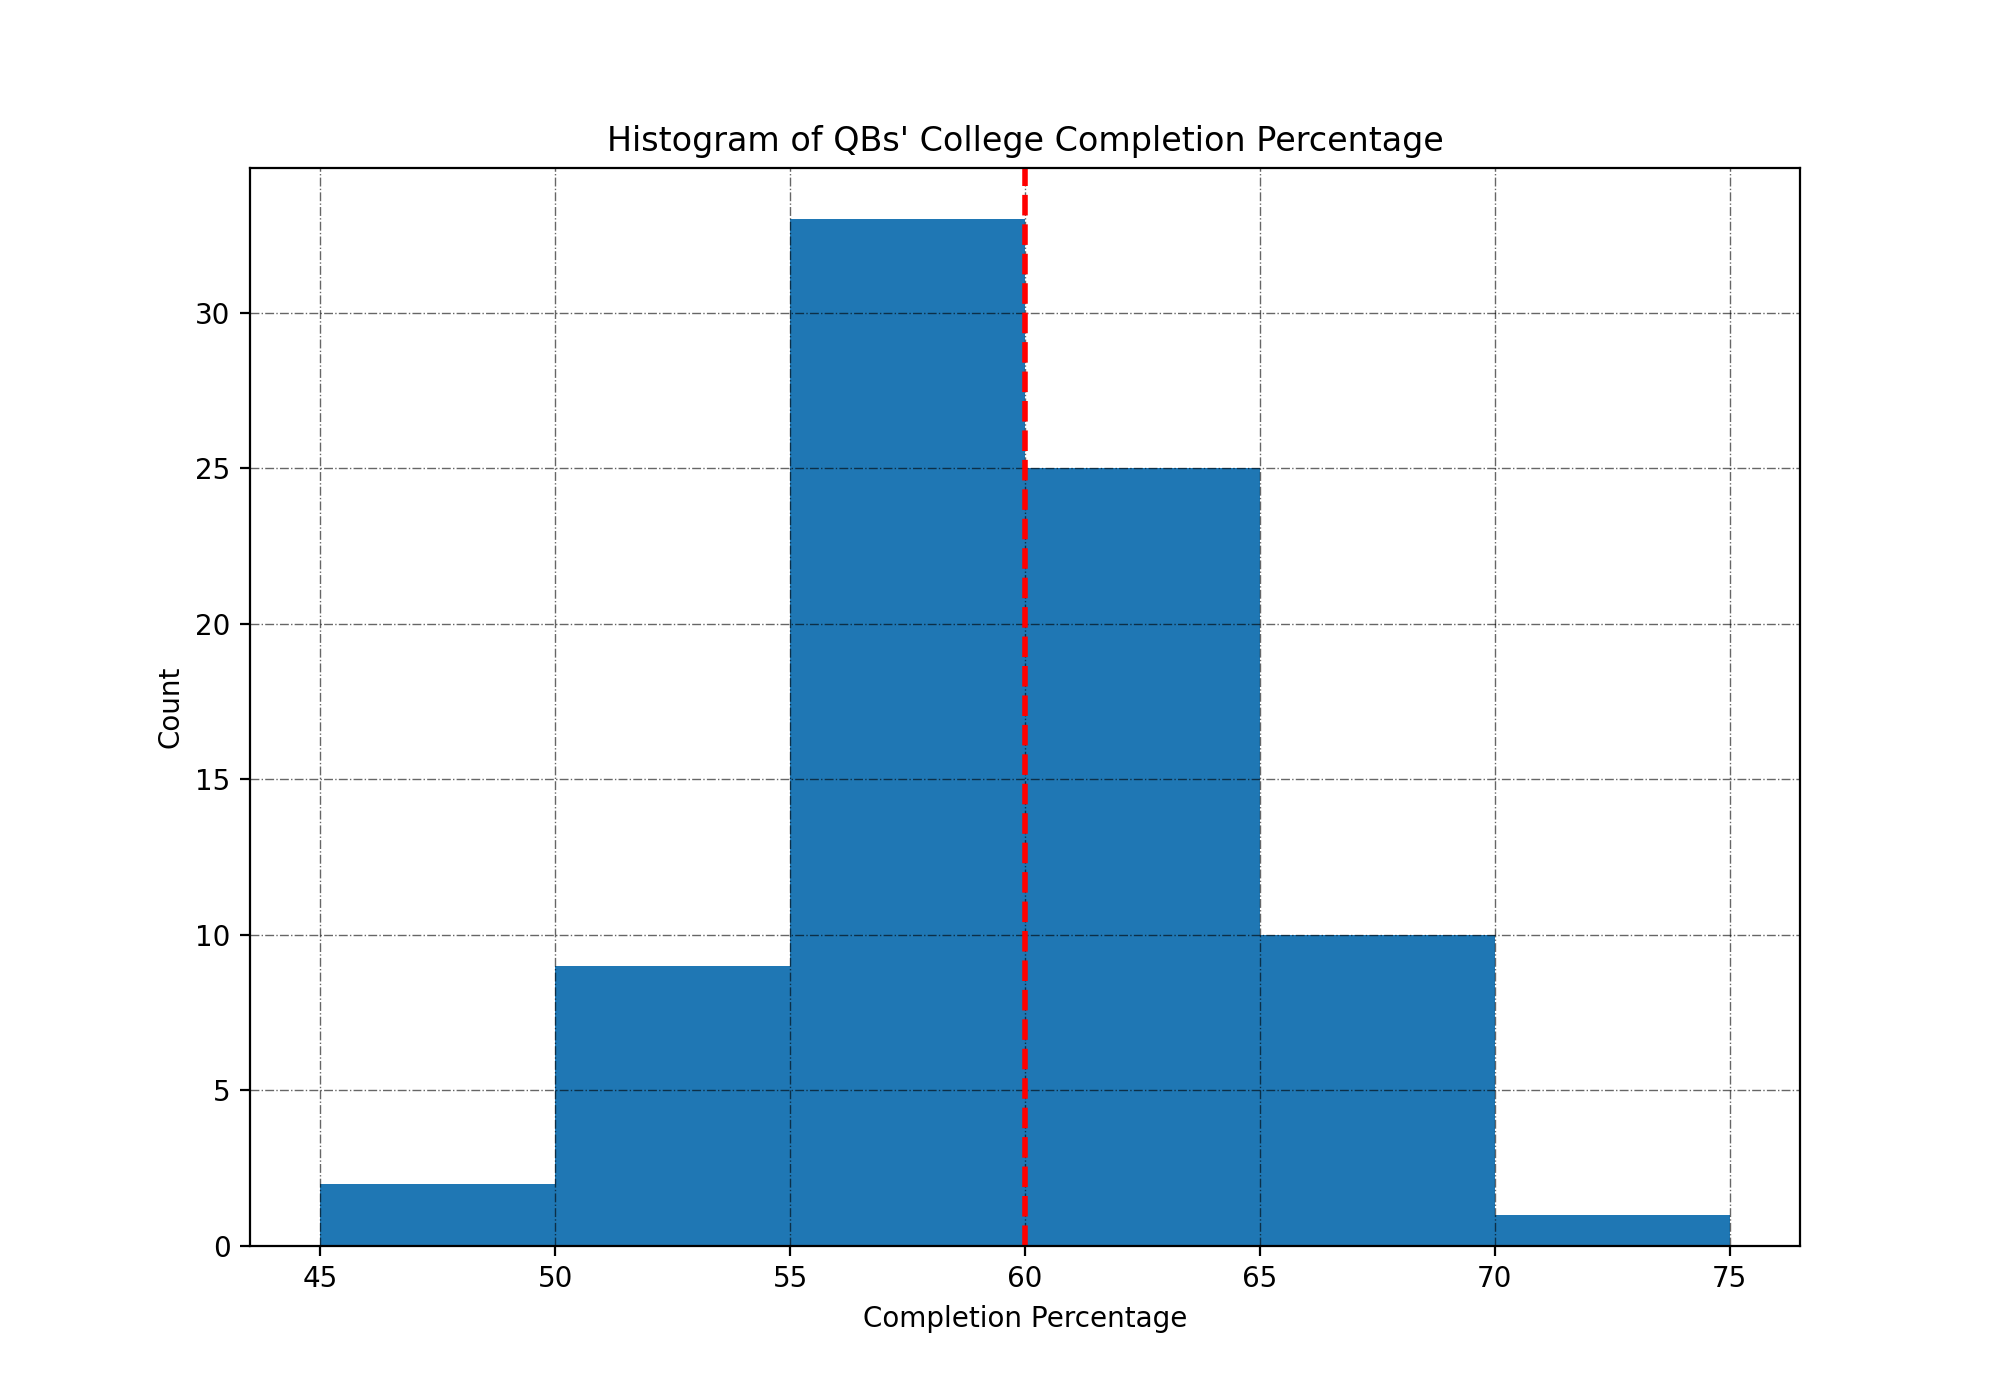

(array([ 2.,  9., 33., 25., 10.,  1.]),
 array([45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 6 artists>)

Text(0.5, 1.0, "Histogram of QBs' College Completion Percentage")

Text(0.5, 0, 'Completion Percentage')

Text(0, 0.5, 'Count')

In [117]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data.pct, bins = [45,50,55,60,65,70,75])

ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6)

ax.set_title("Histogram of QBs' College Completion Percentage")
ax.set_xlabel("Completion Percentage")
ax.set_ylabel("Count")
ax.axvline(x=60, color='r', linestyle='dashed', linewidth=2)


plt.show()

plt.savefig("Completion_percentage_histogram.png")

<IPython.core.display.Javascript object>


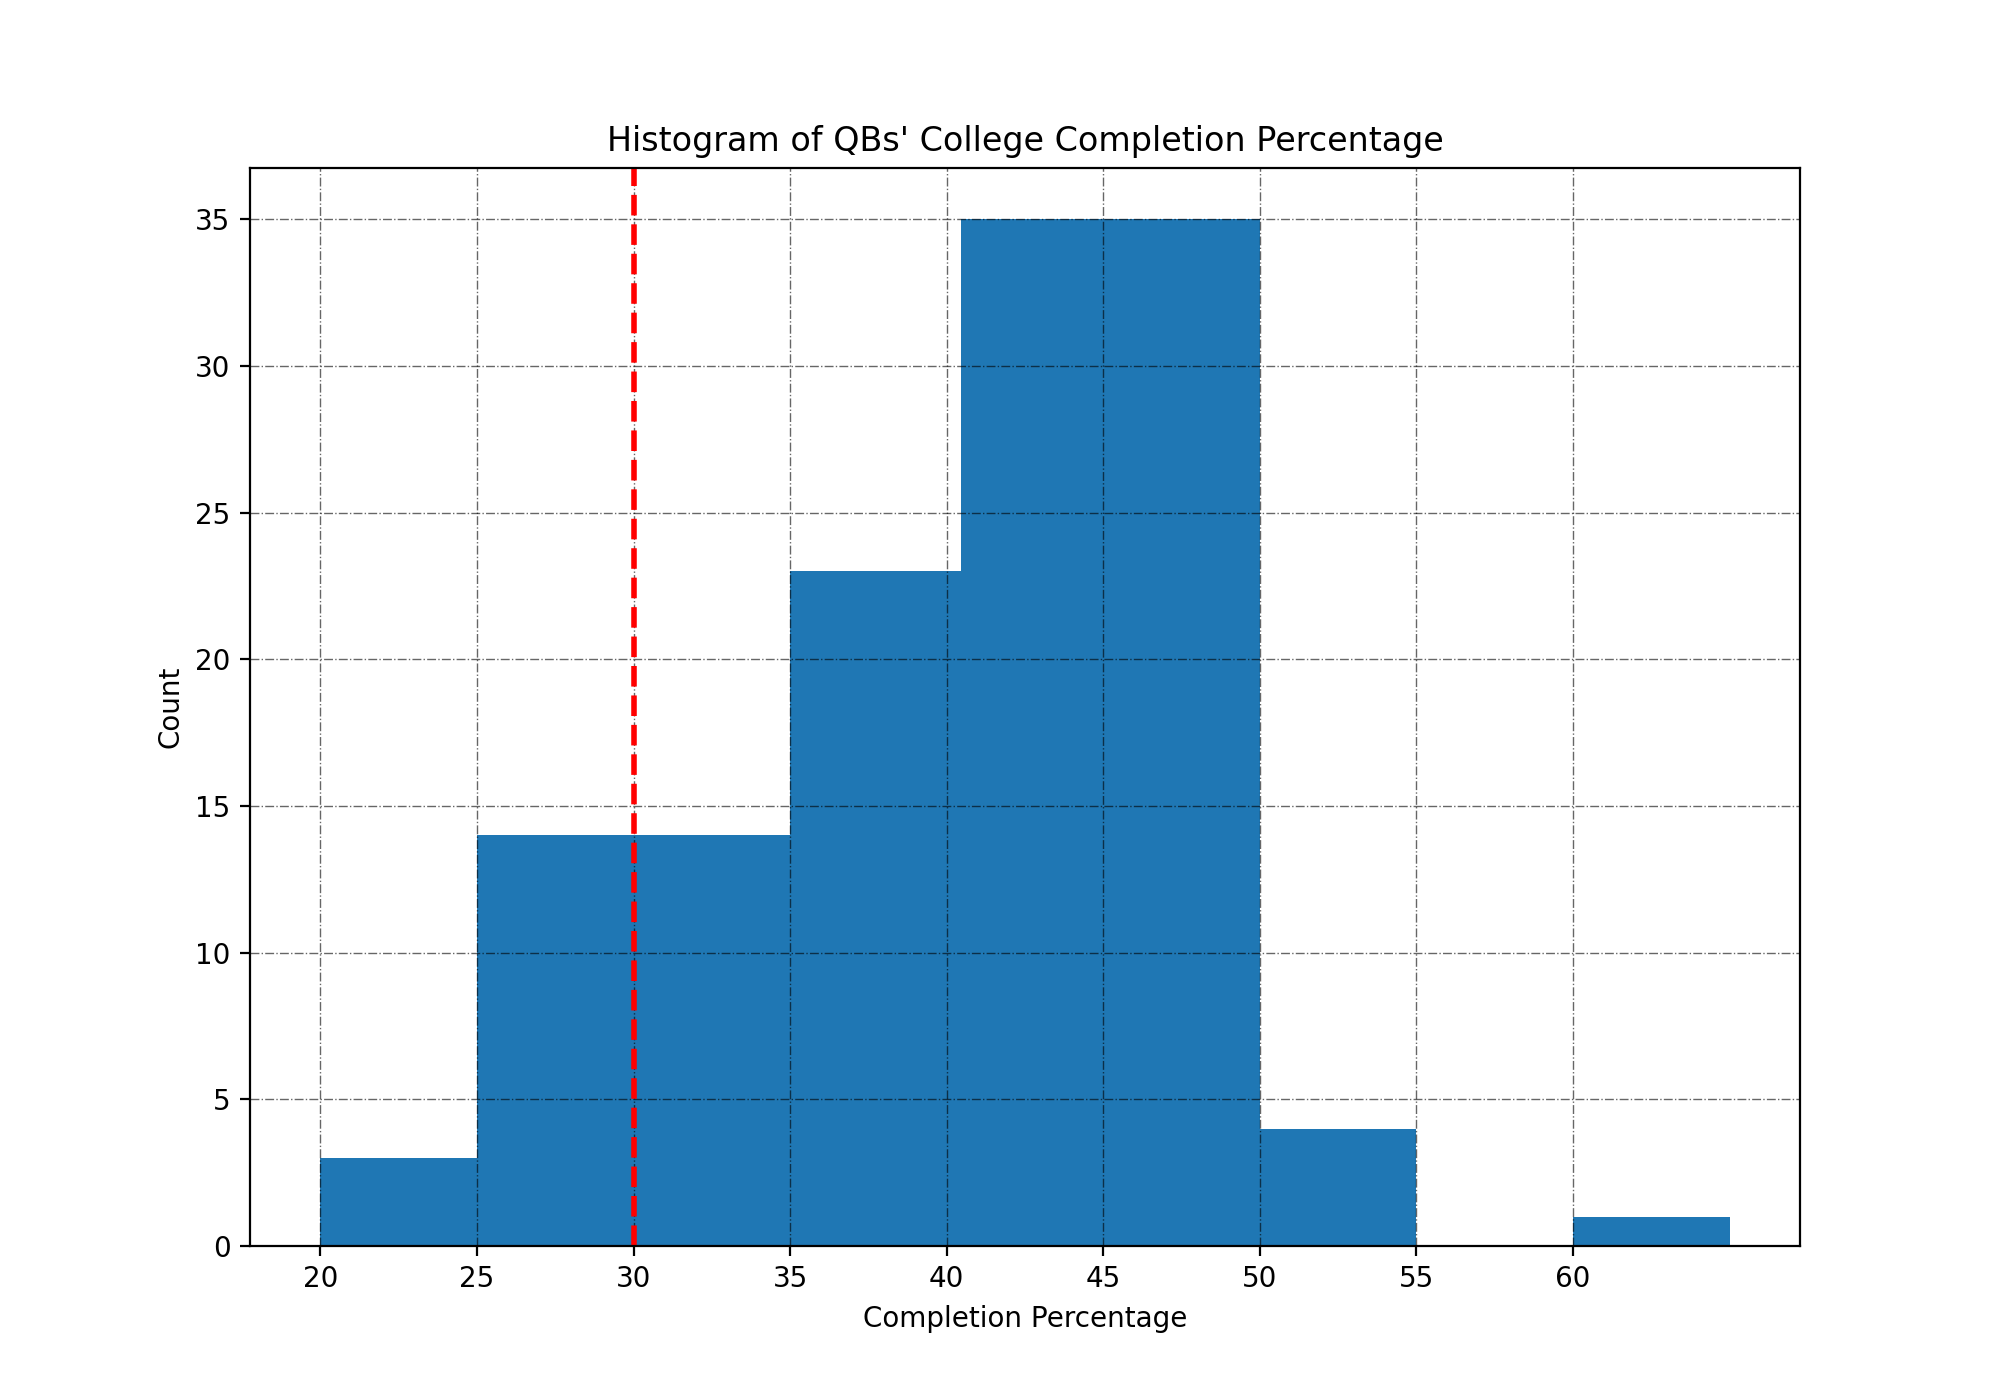

(array([ 3., 14., 23., 35.,  4.,  0.,  1.]),
 array([20.  , 25.  , 35.  , 40.45, 50.  , 55.  , 60.  , 65.  ]),
 <BarContainer object of 7 artists>)

Text(0.5, 1.0, "Histogram of QBs' College Completion Percentage")

Text(0.5, 0, 'Completion Percentage')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x7ff3a83e3c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [123]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data.college_career_games, bins = [20,25,35,40.45,50,55,60,65])

ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6)

ax.set_title("Histogram of QBs' College Completion Percentage")
ax.set_xlabel("Completion Percentage")
ax.set_ylabel("Count")
ax.axvline(x=30, color='r', linestyle='dashed', linewidth=2)

plt.xticks(np.arange(20, 65, 5))



plt.show()

plt.savefig("College_games_histogram.png")

<IPython.core.display.Javascript object>


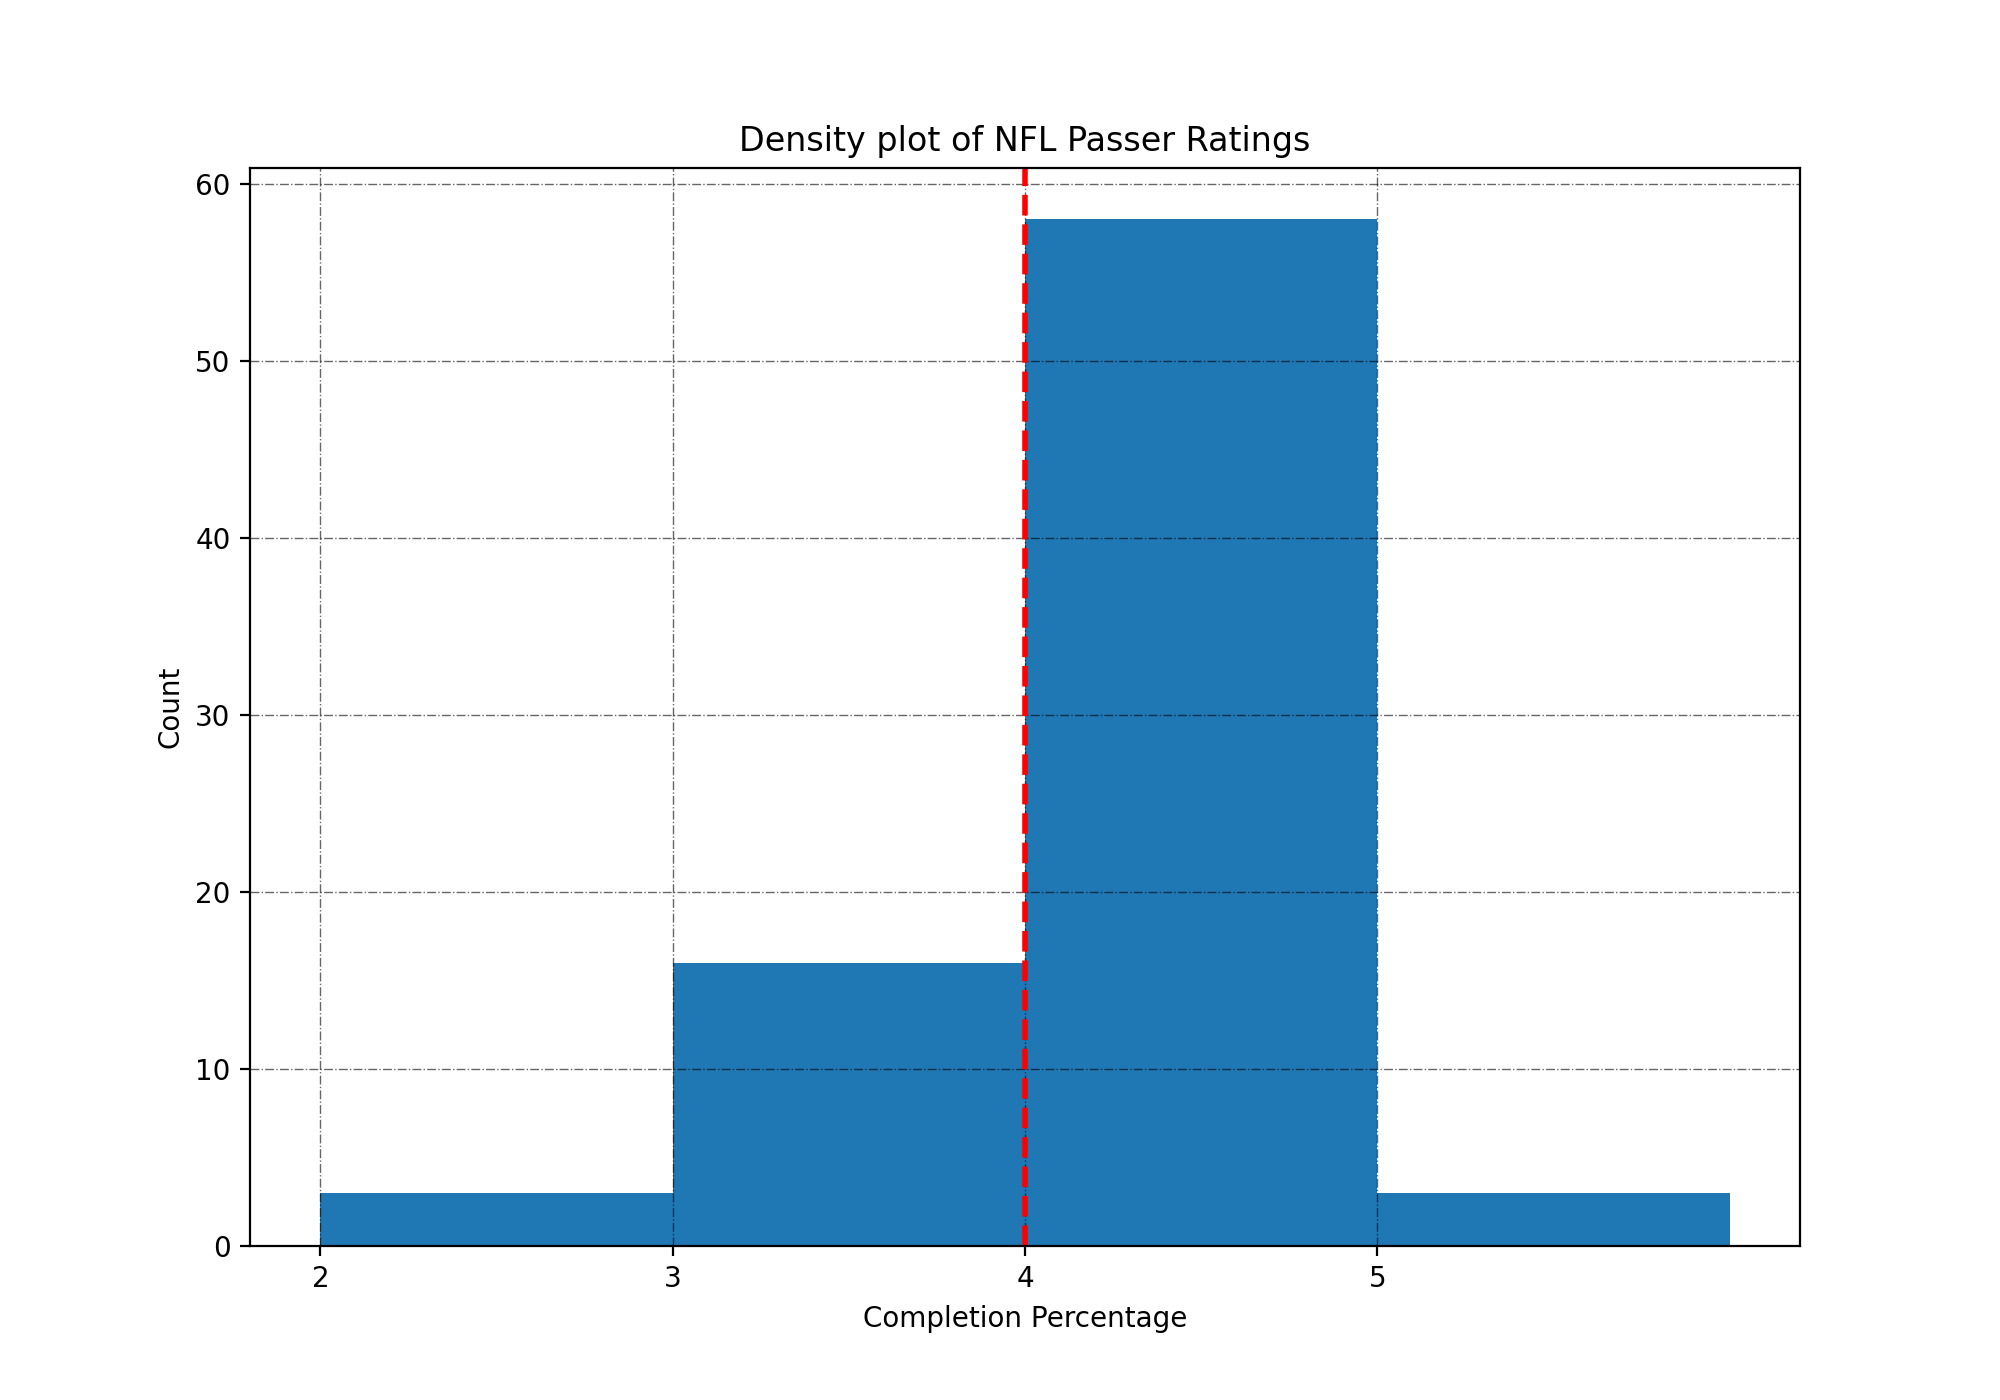

(array([ 3., 16., 58.,  3.]),
 array([2, 3, 4, 5, 6]),
 <BarContainer object of 4 artists>)

Text(0.5, 1.0, "Histogram of QBs' College Completion Percentage")

Text(0.5, 0, 'Completion Percentage')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x7ff3a8877a00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

In [127]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data.college_career_years, bins = [2,3,4,5,6])

ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6)

ax.set_title("Histogram of QBs' College Completion Percentage")
ax.set_xlabel("Completion Percentage")
ax.set_ylabel("Count")
ax.axvline(x=4, color='r', linestyle='dashed', linewidth=2)

plt.xticks(np.arange(2, 6, 1))



plt.show()

plt.savefig("College_years_histogram.png")